# 1. ÏßÄÎèÑÌïôÏäµ

## SVM

In [ ]:
# SVM Í∏∞Î∞ò ÏÇºÏÑ±Ï†ÑÏûê Ïù¥ÏÉÅÌÉêÏßÄ ÏòàÏ†ú

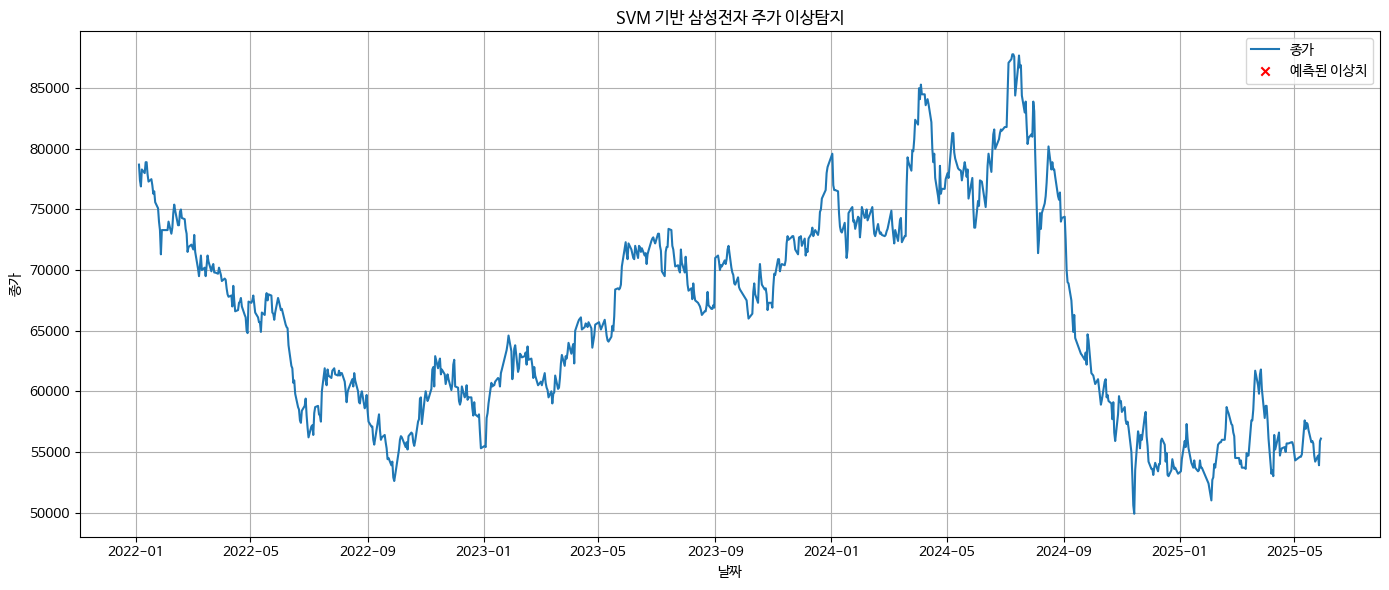

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
df = stock.get_market_ohlcv_by_date("2022-01-01", "2025-05-31", "005930")[['Ï¢ÖÍ∞Ä']].copy()
df.dropna(inplace=True)

# 2. Î°úÍ∑∏ ÏàòÏùµÎ•† Í≥ÑÏÇ∞ Î∞è Ïù¥ÏÉÅÏπò ÎùºÎ≤®ÎßÅ
df['log_return'] = np.log(df['Ï¢ÖÍ∞Ä'] / df['Ï¢ÖÍ∞Ä'].shift(1))
df['return_shift'] = df['log_return'].shift(-1)
df.dropna(inplace=True)

# 3. ÏÉÅ/ÌïòÏúÑ 2.5% Íµ¨Í∞ÑÏùÑ Ïù¥ÏÉÅÏπòÎ°ú Ï†ïÏùò
# quantile(0.975)ÏôÄ quantile(0.025):
# ÏàòÏùµÎ•† Î∂ÑÌè¨Ïùò ÏÉÅÏúÑ 2.5%ÏôÄ ÌïòÏúÑ 2.5% ÏßÄÏ†êÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
# Ï¶â, ÏÉÅÏúÑ 2.5%Îäî Í∏âÎì±Ìïú ÎÇ†, ÌïòÏúÑ 2.5%Îäî Í∏âÎùΩÌïú ÎÇ†ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
# Ïù¥ Íµ¨Í∞Ñ Î∞îÍπ•Ïùò Í∞íÎì§ÏùÑ "Ïù¥ÏÉÅÏπò"Î°ú Í∞ÑÏ£ºÌï©ÎãàÎã§.
    
upper = df['return_shift'].quantile(0.975)
lower = df['return_shift'].quantile(0.025)
df['label'] = ((df['return_shift'] > upper) | (df['return_shift'] < lower)).astype(int)

# 4. Ïä§ÏºÄÏùºÎßÅ Î∞è ÌõàÎ†®/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X = df[['log_return']]
y = df['label']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. SVM Î™®Îç∏ ÌïôÏäµ
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# 6. Ï†ÑÏ≤¥ ÏòàÏ∏° Î∞è ÏãúÍ∞ÅÌôî
df['predicted'] = model.predict(X_scaled)

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Ï¢ÖÍ∞Ä'], label='Ï¢ÖÍ∞Ä')
plt.scatter(df.index[df['predicted'] == 1], df['Ï¢ÖÍ∞Ä'][df['predicted'] == 1], color='red', marker='x', label='ÏòàÏ∏°Îêú Ïù¥ÏÉÅÏπò')
plt.title("SVM Í∏∞Î∞ò ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Ïù¥ÏÉÅÌÉêÏßÄ")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Ï¢ÖÍ∞Ä")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## RandomForest

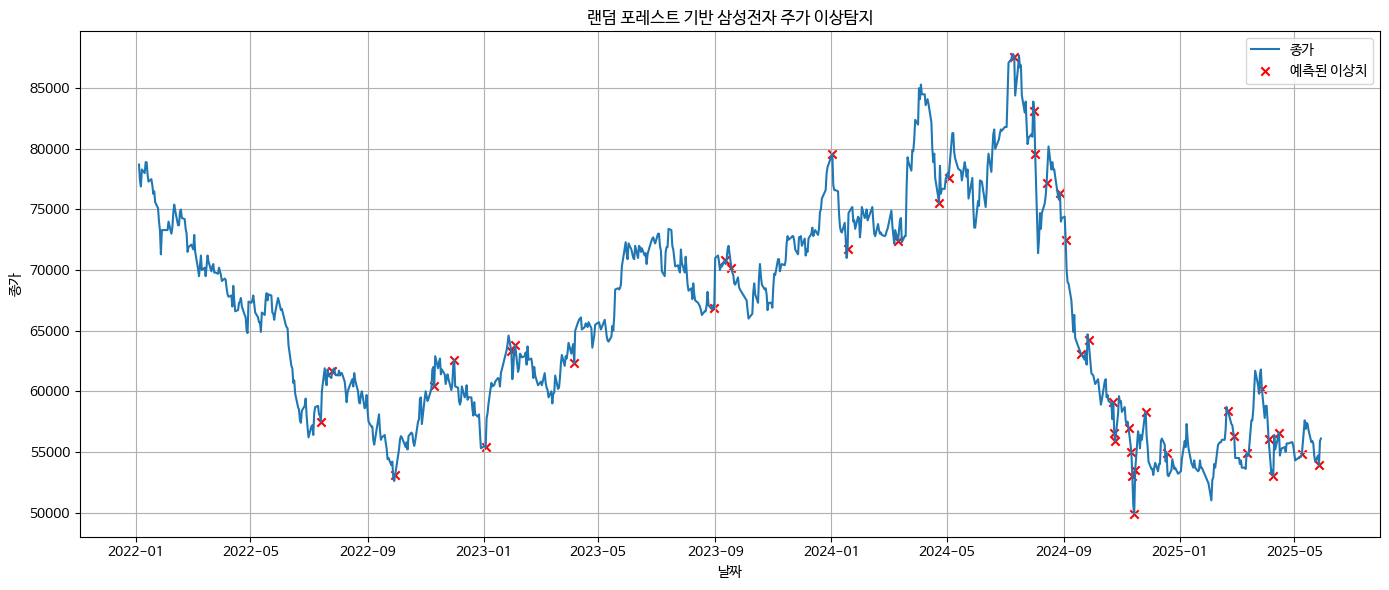

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ÏÇºÏÑ±Ï†ÑÏûê Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
df = stock.get_market_ohlcv_by_date("2022-01-01", "2025-05-31", "005930")[['Ï¢ÖÍ∞Ä']].copy()
df.dropna(inplace=True)

# Î°úÍ∑∏ ÏàòÏùµÎ•† Î∞è Î†àÏù¥Î∏î ÏÉùÏÑ±
df['log_return'] = np.log(df['Ï¢ÖÍ∞Ä'] / df['Ï¢ÖÍ∞Ä'].shift(1))
df['return_shift'] = df['log_return'].shift(-1)
df.dropna(inplace=True)

# ÏÉÅ/ÌïòÏúÑ 2.5%Î•º Ïù¥ÏÉÅÏπòÎ°ú Í∞ÑÏ£ºÌïú ÎùºÎ≤® ÏÉùÏÑ±
upper = df['return_shift'].quantile(0.975)
lower = df['return_shift'].quantile(0.025)
df['label'] = ((df['return_shift'] > upper) | (df['return_shift'] < lower)).astype(int)

# ÌîºÏ≤ò Ïä§ÏºÄÏùºÎßÅ
X = df[['log_return']]
y = df['label']
X_scaled = StandardScaler().fit_transform(X)

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÌïôÏäµ
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ÏòàÏ∏°
df['predicted'] = model.predict(X_scaled)

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Ï¢ÖÍ∞Ä'], label='Ï¢ÖÍ∞Ä')
plt.scatter(df.index[df['predicted'] == 1], df['Ï¢ÖÍ∞Ä'][df['predicted'] == 1],
            color='red', label='ÏòàÏ∏°Îêú Ïù¥ÏÉÅÏπò', marker='x')
plt.title("ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Í∏∞Î∞ò ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Ïù¥ÏÉÅÌÉêÏßÄ")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Ï¢ÖÍ∞Ä")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Autoencoder 

In [ ]:
# Autoencoder Íµ¨Ï°∞Îäî 1Ï∞®Ïõê ÏûÖÎ†•Ïóê ÎåÄÌï¥ Ïù∏ÏΩîÎî©/ÎîîÏΩîÎî©ÏùÑ Î∞òÎ≥µÌïòÏó¨ Ïû¨Íµ¨ÏÑ± Ïò§Ï∞®Î•º Í∏∞Î∞òÏúºÎ°ú Ïù¥ÏÉÅ ÌÉêÏßÄÎ•º ÏàòÌñâÌï©ÎãàÎã§.
# Ïù¥ÏÉÅÏπò Í∏∞Ï§ÄÏùÄ Ïû¨Íµ¨ÏÑ± Ïò§Ï∞®(MSE)Ïùò ÏÉÅÏúÑ 2.5%ÏûÖÎãàÎã§.
# Îç∞Ïù¥ÌÑ∞Îäî log_returnÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï†ÑÏ≤òÎ¶¨Ìï©ÎãàÎã§.

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
42/42 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - loss: 1.3903
Epoch 2/50
42/42 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - loss: 0.8177
Epoch 3/50
42/42 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - loss: 0.7149
Epoch 4/50
42/42 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 970us/step - loss: 0.5230
Epoch 5/50
42/42 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - loss: 0.4502
Epoch 6/50
42/42 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - loss: 0.5357
Epoch 7/50
42/42 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 996us/step - loss: 0.4878
Epoch 8/50
42/42 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 973us/step - loss: 0.3609
Epoch 9/50
42/42 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - loss: 0.4922
Epoch 10/50
42/42 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

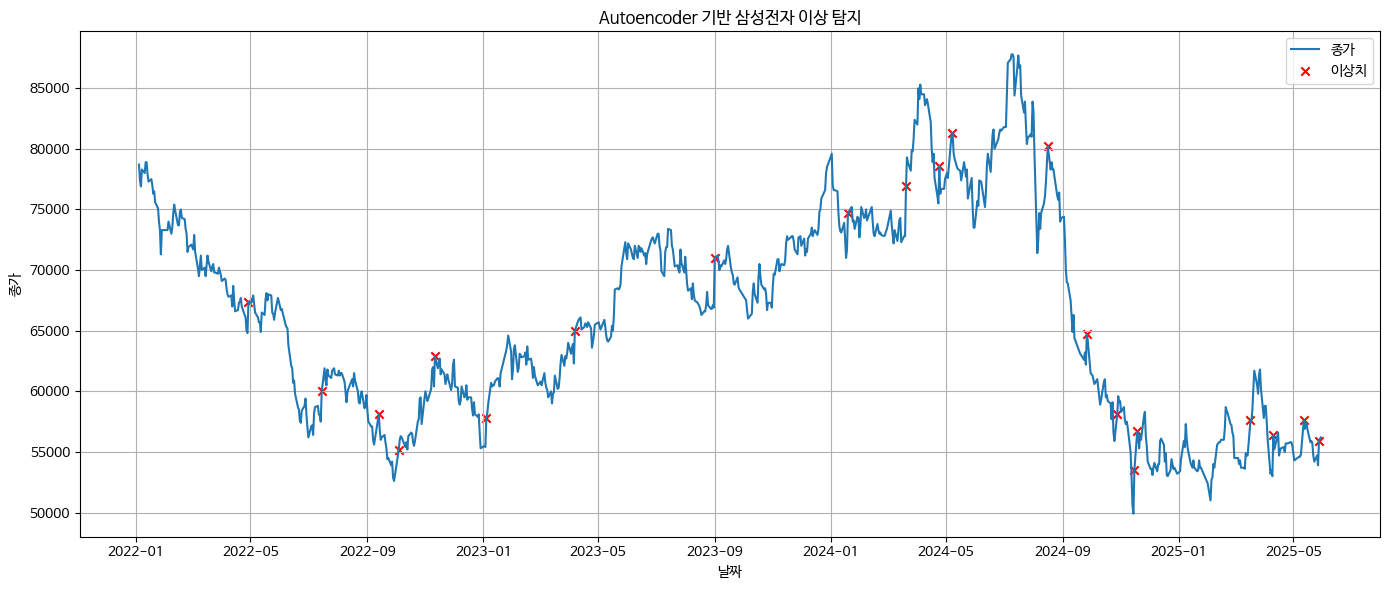

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
df = stock.get_market_ohlcv_by_date("2022-01-01", "2025-05-31", "005930")[['Ï¢ÖÍ∞Ä']].copy()
df.dropna(inplace=True)

# 2. Î°úÍ∑∏ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
df['log_return'] = np.log(df['Ï¢ÖÍ∞Ä'] / df['Ï¢ÖÍ∞Ä'].shift(1))
df.dropna(inplace=True)

# 3. Ï†ïÍ∑úÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['log_return']])

# 4. Autoencoder Î™®Îç∏ Ï†ïÏùò
model = Sequential([
    Dense(8, activation='relu', input_shape=(1,)),
    Dense(4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 5. ÌïôÏäµ
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)
model.fit(X_train, X_train, epochs=50, batch_size=16, verbose=1)

# 6. Ïû¨Íµ¨ÏÑ± Ïò§Ï∞® Í≥ÑÏÇ∞ Î∞è Ïù¥ÏÉÅ ÌÉêÏßÄ
reconstructions = model.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructions, 2), axis=1)
threshold = np.percentile(mse, 97.5)  # ÏÉÅÏúÑ 2.5%Î•º Ïù¥ÏÉÅÏπòÎ°ú Í∞ÑÏ£º
df['anomaly'] = mse > threshold

# 7. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Ï¢ÖÍ∞Ä'], label='Ï¢ÖÍ∞Ä')
plt.scatter(df.index[df['anomaly']], df['Ï¢ÖÍ∞Ä'][df['anomaly']], color='red', label='Ïù¥ÏÉÅÏπò', marker='x')
plt.title("Autoencoder Í∏∞Î∞ò ÏÇºÏÑ±Ï†ÑÏûê Ïù¥ÏÉÅ ÌÉêÏßÄ")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Ï¢ÖÍ∞Ä")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ÎπÑÏßÄÎèÑÌïôÏäµ

## IsolationForest Í∏∞Î∞ò Ïù¥ÏÉÅ ÌÉêÏßÄ ÏΩîÎìú (ÏÇºÏÑ±Ï†ÑÏûê)

In [ ]:
# Î≥ÄÌôò	Î°úÍ∑∏ ÏàòÏùµÎ•†ÏùÑ Ïù¥ÏÉÅ ÌÉêÏßÄ Í∏∞Ï§Ä ÌîºÏ≤òÎ°ú ÏÇ¨Ïö©
# Î™®Îç∏	IsolationForest: Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ÏóêÏÑú Í≥†Î¶ΩÎêú Ï†ê(Ïù¥ÏÉÅÏπò)ÏùÑ Ìä∏Î¶¨ Í∏∞Î∞ò Î∞©ÏãùÏúºÎ°ú ÌåêÎ≥Ñ

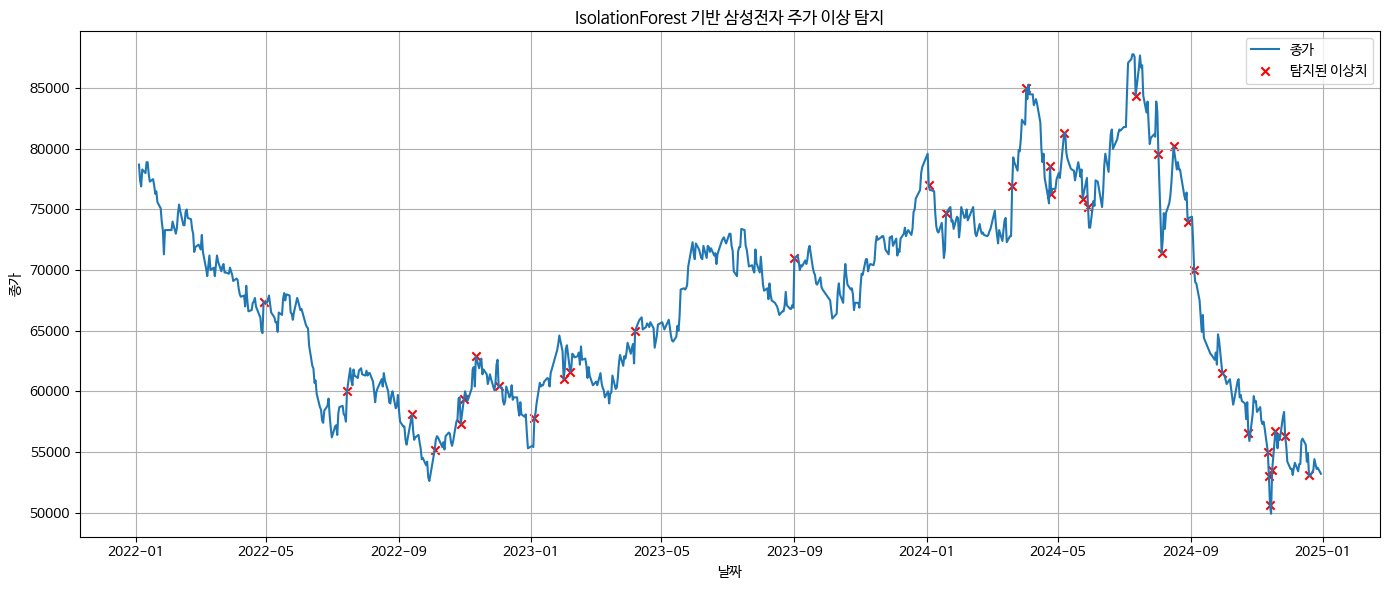

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# 1. ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
df = stock.get_market_ohlcv_by_date("2022-01-01", "2024-12-31", "005930")[['Ï¢ÖÍ∞Ä']].copy()
df.dropna(inplace=True)

# 2. Î°úÍ∑∏ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
df['log_return'] = np.log(df['Ï¢ÖÍ∞Ä'] / df['Ï¢ÖÍ∞Ä'].shift(1))
df.dropna(inplace=True)

# 3. ÌîºÏ≤ò Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['log_return']])

# 4. IsolationForest Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
# contamination=0.05 : Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë 5%Î•º Ïù¥ÏÉÅÏπòÎ°ú Í∞ÑÏ£ºÌïòÎùºÎäî ÏùòÎØ∏ÏûÖÎãàÎã§.
# Ï¶â, ÏïåÍ≥†Î¶¨Ï¶òÏù¥ ÏûêÎèôÏúºÎ°ú Ï†ÑÏ≤¥ ÏÉòÌîåÏùò ÏÉÅÏúÑ/ÌïòÏúÑ 5%Î•º Ïù¥ÏÉÅÏπòÎ°ú ÌåêÎã®Ìï©ÎãàÎã§.
# random_state=42 : ÎûúÎç§ÏÑ± Ï†úÏñ¥Ïö© ÏãúÎìú Í∞íÏûÖÎãàÎã§. Ïã§ÌñâÌï† ÎïåÎßàÎã§ ÎèôÏùºÌïú Í≤∞Í≥ºÍ∞Ä ÎÇòÏò§ÎèÑÎ°ù Í≥†Ï†ïÌï©ÎãàÎã§.
    # fit_predict(X_scaled) : ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞(X_scaled)Î•º Í∏∞Î∞òÏúºÎ°ú Î™®Îç∏ÏùÑ ÌïôÏäµ(fit) ÌïòÍ≥†, Ïù¥ÏÉÅÏπò ÏòàÏ∏° Í≤∞Í≥ºÎ•º Î∞òÌôòÌï©ÎãàÎã§.

iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(X_scaled)

# 5. Ïù¥ÏÉÅÏπò Ïó¨Î∂ÄÎ•º 1/0ÏúºÎ°ú Î≥ÄÌôò (1=Ï†ïÏÉÅ, -1=Ïù¥ÏÉÅ)
# df['anomaly'] :  1 ÎòêÎäî -1Î°ú Íµ¨ÏÑ±Îêú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Í≤∞Í≥ºÎ•º ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÏÉàÎ°úÏö¥ Ïó¥Î°ú Ï∂îÍ∞ÄÌï©ÎãàÎã§.

df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

# 6. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Ï¢ÖÍ∞Ä'], label='Ï¢ÖÍ∞Ä')
plt.scatter(df.index[df['anomaly'] == 1], df['Ï¢ÖÍ∞Ä'][df['anomaly'] == 1],
            color='red', label='ÌÉêÏßÄÎêú Ïù¥ÏÉÅÏπò', marker='x')
plt.title("IsolationForest Í∏∞Î∞ò ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Ïù¥ÏÉÅ ÌÉêÏßÄ")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Ï¢ÖÍ∞Ä")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## IsolationForest Ïù¥ÏÉÅÏπò Ï†êÏàò Í≥ÑÏÇ∞ ÏòàÏ†ú

In [ ]:
# Ïù¥ÏÉÅÏπò Ï†êÏàòÎ°ú ÌåêÎã®ÌïòÎäî ÏÇ¨Î°Ä

               Ï¢ÖÍ∞Ä  log_return  anomaly_score  is_outlier
ÎÇ†Ïßú                                                      
2024-08-05  71400   -0.108716      -0.170870          -1
2024-11-15  53500    0.069661      -0.159266          -1
2023-09-01  71000    0.059481      -0.137481          -1
2024-11-18  56700    0.058093      -0.133421          -1
2024-11-13  50600   -0.046340      -0.128482          -1
2024-03-20  76900    0.054790      -0.124868          -1
2024-10-24  56600   -0.043222      -0.111424          -1
2024-09-30  61500   -0.042966      -0.109462          -1
2024-08-02  79600   -0.043031      -0.109462          -1
2024-05-07  81300    0.046579      -0.068496          -1


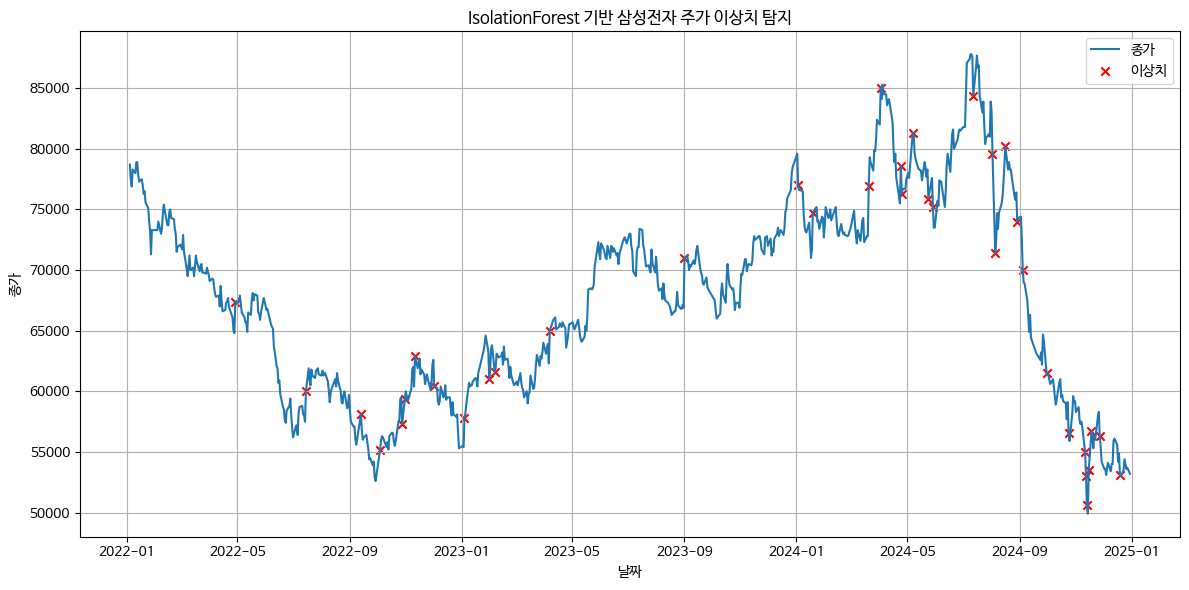

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock
from sklearn.ensemble import IsolationForest

# 1. Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
df = stock.get_market_ohlcv_by_date("2022-01-01", "2024-12-31", "005930")[['Ï¢ÖÍ∞Ä']].copy()
df.dropna(inplace=True)

# 2. Î°úÍ∑∏ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
df['log_return'] = np.log(df['Ï¢ÖÍ∞Ä'] / df['Ï¢ÖÍ∞Ä'].shift(1))
df.dropna(inplace=True)

# 3. IsolationForest Ï†ÅÏö©
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(df[['log_return']])
df['anomaly_score'] = model.decision_function(df[['log_return']])
df['is_outlier'] = model.predict(df[['log_return']])

# 4. Ïù¥ÏÉÅÏπò Ï†êÏàòÍ∞Ä ÎÇÆÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÏó¨ Ï∂úÎ†•
sorted_df = df.sort_values(by='anomaly_score').copy()
print(sorted_df[['Ï¢ÖÍ∞Ä', 'log_return', 'anomaly_score', 'is_outlier']].head(10))  # ÏÉÅÏúÑ 10Í∞ú

# 5. Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ï¢ÖÍ∞Ä'], label='Ï¢ÖÍ∞Ä')
plt.scatter(df[df['is_outlier'] == -1].index,
            df[df['is_outlier'] == -1]['Ï¢ÖÍ∞Ä'],
            color='red', label='Ïù¥ÏÉÅÏπò', marker='x')
plt.title("IsolationForest Í∏∞Î∞ò ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Ïù¥ÏÉÅÏπò ÌÉêÏßÄ")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Ï¢ÖÍ∞Ä")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# anomaly_score: Ïù¥ÏÉÅÏπòÏùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÑÏàòÎ°ù Í∞íÏù¥ ÏûëÏïÑÏßê (IsolationForest ÌäπÏÑ±).
# is_outlier: -1ÏùÄ Ïù¥ÏÉÅÏπò, 1ÏùÄ Ï†ïÏÉÅÏπò.
# sort_values(by='anomaly_score'): Ï†êÏàòÍ∞Ä Í∞ÄÏû• ÎÇÆÏùÄ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ÌïòÏó¨ Í∞ÄÏû• ÏùòÏã¨Ïä§Îü¨Ïö¥ Ïù¥ÏÉÅÏπòÎ•º ÌôïÏù∏Ìï©ÎãàÎã§.

## K-Means Í∏∞Î∞ò Ïù¥ÏÉÅ ÌÉêÏßÄ ÏΩîÎìú (ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä)

In [ ]:
# Ïù¥ÏÉÅÏπò ÌåêÎã® Í∏∞Ï§Ä	ÌèâÍ∑† ÏàòÏùµÎ•†Ïù¥ Í∞ÄÏû• ÎÇÆÏùÄ ÌÅ¥Îü¨Ïä§ÌÑ∞Î•º Ïù¥ÏÉÅÏπòÎ°ú Í∞ÑÏ£º
# Ïû•Ï†ê	Í∞ÑÎã®ÌïòÍ≥† ÏßÅÍ¥ÄÏ†ÅÏù¥Î©∞, Î∞ÄÎèÑ Í∏∞Î∞ò Ïù¥ÏÉÅÏπòÍ∞Ä ÏóÜÏùÑ ÎïåÎèÑ Ïú†Ïö©
# Îã®Ï†ê	Ïù¥ÏÉÅÏπòÍ∞Ä ÎöúÎ†∑ÌïòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ ÌåêÎã®Ïù¥ Ïñ¥Î†§Ïö∏ Ïàò ÏûàÏùå

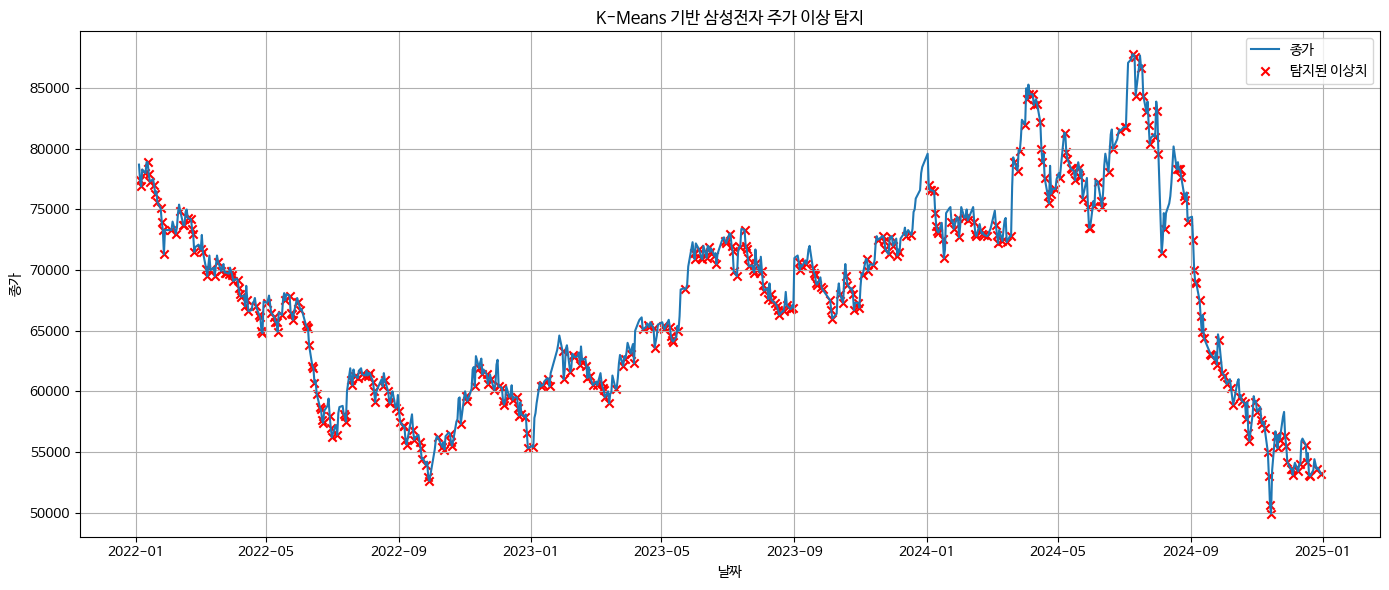

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
df = stock.get_market_ohlcv_by_date("2022-01-01", "2024-12-31", "005930")[['Ï¢ÖÍ∞Ä']].copy()
df.dropna(inplace=True)

# 2. Î°úÍ∑∏ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
df['log_return'] = np.log(df['Ï¢ÖÍ∞Ä'] / df['Ï¢ÖÍ∞Ä'].shift(1))
df.dropna(inplace=True)

# 3. ÌîºÏ≤ò Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['log_return']])

# 4. KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÎäî 2Í∞úÎ°ú Í∞ÄÏ†ï)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 5. Ïù¥ÏÉÅ ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌåêÎ≥Ñ: ÌèâÍ∑† ÏàòÏùµÎ•†Ïù¥ ÎÇÆÏùÄ Ï™ΩÏùÑ Ïù¥ÏÉÅÏπòÎ°ú Í∞ÄÏ†ï
cluster_means = df.groupby('cluster')['log_return'].mean()
outlier_cluster = cluster_means.idxmin()
df['anomaly'] = (df['cluster'] == outlier_cluster).astype(int)

# 6. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Ï¢ÖÍ∞Ä'], label='Ï¢ÖÍ∞Ä')
plt.scatter(df.index[df['anomaly'] == 1], df['Ï¢ÖÍ∞Ä'][df['anomaly'] == 1],
            color='red', label='ÌÉêÏßÄÎêú Ïù¥ÏÉÅÏπò', marker='x')
plt.title("K-Means Í∏∞Î∞ò ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Ïù¥ÏÉÅ ÌÉêÏßÄ")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Ï¢ÖÍ∞Ä")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## PCA Í∏∞Î∞ò Ïù¥ÏÉÅÌÉêÏßÄ ÏΩîÎìú (PyKrx + IsolationForest ÏÇ¨Ïö©)

In [ ]:
# PCA Ï∞®Ïõê Ï∂ïÏÜå	Í≥†Ï∞®Ïõê Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º 2DÎ°ú Ï§ÑÏó¨ Ïù¥ÏÉÅ ÌÉêÏßÄ Ìö®Ïú® Ìñ•ÏÉÅ
# Isolation Forest	Í≥†Î¶ΩÍ∏∞Î∞ò Ïù¥ÏÉÅ ÌÉêÏßÄ ÏïåÍ≥†Î¶¨Ï¶ò
# ÏãúÍ∞ÅÌôî	Ï¢ÖÍ∞Ä ÏãúÍ≥ÑÏó¥ ÏúÑÏóê Ïù¥ÏÉÅÏπòÎ•º Îπ®Í∞Ñ xÎ°ú ÌëúÏãú

C:\Users\JYB\AppData\Local\Temp\ipykernel_6416\3097195644.py:42: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


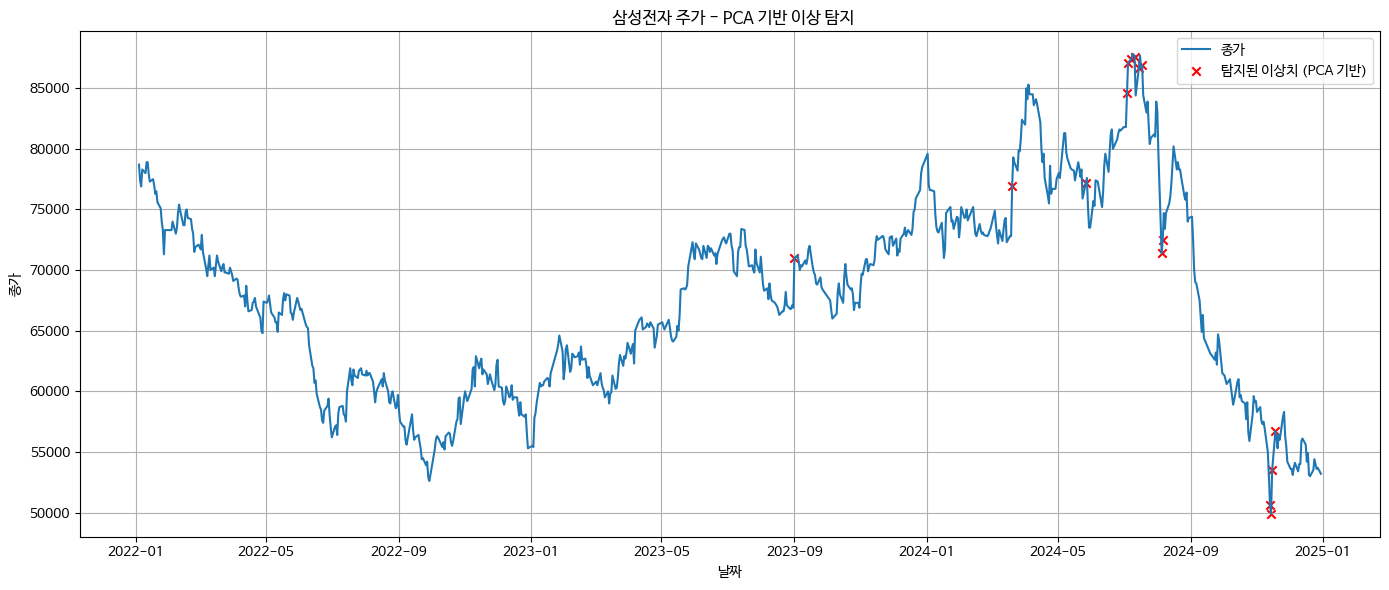

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# 1. ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
df = stock.get_market_ohlcv_by_date("2022-01-01", "2024-12-31", "005930")[['ÏãúÍ∞Ä', 'Í≥†Í∞Ä', 'Ï†ÄÍ∞Ä', 'Ï¢ÖÍ∞Ä', 'Í±∞ÎûòÎüâ']]
df.dropna(inplace=True)

# 2. ÌååÏÉù Î≥ÄÏàò Ï∂îÍ∞Ä
df['log_return'] = np.log(df['Ï¢ÖÍ∞Ä'] / df['Ï¢ÖÍ∞Ä'].shift(1))
df['high_low_range'] = df['Í≥†Í∞Ä'] - df['Ï†ÄÍ∞Ä']
df.dropna(inplace=True)

# 3. Ïä§ÏºÄÏùºÎßÅ
features = ['ÏãúÍ∞Ä', 'Í≥†Í∞Ä', 'Ï†ÄÍ∞Ä', 'Ï¢ÖÍ∞Ä', 'Í±∞ÎûòÎüâ', 'log_return', 'high_low_range']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# 4. PCA Ï∞®Ïõê Ï∂ïÏÜå
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Ïù¥ÏÉÅ ÌÉêÏßÄ Î™®Îç∏ (IsolationForest)
clf = IsolationForest(contamination=0.02, random_state=42)
df['anomaly'] = clf.fit_predict(X_pca)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # 1: Ïù¥ÏÉÅÏπò

# 6. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Ï¢ÖÍ∞Ä'], label='Ï¢ÖÍ∞Ä')
plt.scatter(df.index[df['anomaly'] == 1], df['Ï¢ÖÍ∞Ä'][df['anomaly'] == 1],
            color='red', label='ÌÉêÏßÄÎêú Ïù¥ÏÉÅÏπò (PCA Í∏∞Î∞ò)', marker='x')
plt.title("üìâ ÏÇºÏÑ±Ï†ÑÏûê Ï£ºÍ∞Ä - PCA Í∏∞Î∞ò Ïù¥ÏÉÅ ÌÉêÏßÄ")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Ï¢ÖÍ∞Ä")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
## t-SNE + KMeans Í∏∞Î∞ò Ïù¥ÏÉÅÌÉêÏßÄ

In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë	pykrxÎ°ú ÏÇºÏÑ±Ï†ÑÏûê Ï¢ÖÍ∞Ä ÏàòÏßë
# ÌîºÏ≤ò ÏÉùÏÑ±	Î°úÍ∑∏ÏàòÏùµÎ•†, Ïù¥ÎèôÌèâÍ∑†, ÏàòÏùµÎ•† ÌëúÏ§ÄÌé∏Ï∞®
# Ï†ïÍ∑úÌôî	StandardScaler ÏÇ¨Ïö©
# Ï∞®Ïõê Ï∂ïÏÜå	t-SNEÎ°ú 2Ï∞®Ïõê ÏûÑÎ≤†Îî©
# Ïù¥ÏÉÅÌÉêÏßÄ	KMeansÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÌõÑ ÏÜåÏàò ÌÅ¥Îü¨Ïä§ÌÑ∞Î•º Ïù¥ÏÉÅÏπòÎ°ú Í∞ÑÏ£º
# ÏãúÍ∞ÅÌôî	ÏãúÍ≥ÑÏó¥ ÏÉÅÍ≥º ÏûÑÎ≤†Îî© Í≥µÍ∞ÑÏóêÏÑú Ïù¥ÏÉÅÏπò ÌëúÏãú

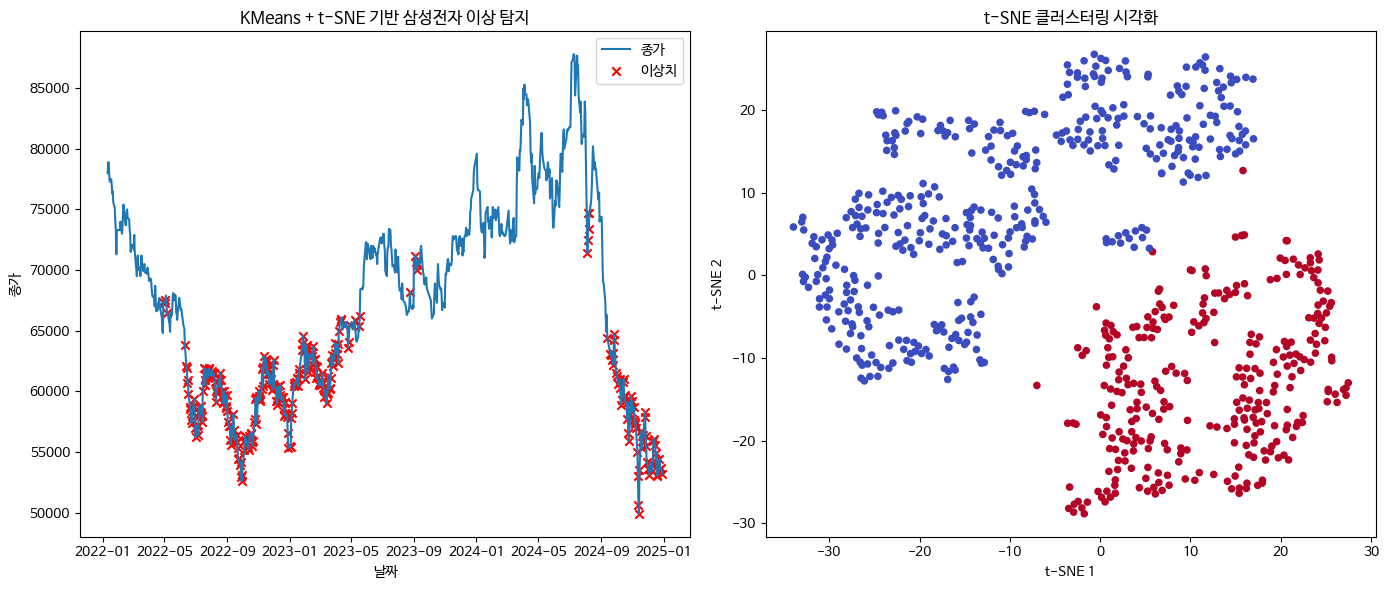

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# 1. ÏÇºÏÑ±Ï†ÑÏûê Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
df = stock.get_market_ohlcv_by_date("2022-01-01", "2024-12-31", "005930")[['Ï¢ÖÍ∞Ä']].copy()
df.dropna(inplace=True)

# 2. ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±
df['log_return'] = np.log(df['Ï¢ÖÍ∞Ä'] / df['Ï¢ÖÍ∞Ä'].shift(1))
df['ma_5'] = df['Ï¢ÖÍ∞Ä'].rolling(window=5).mean()
df['std_5'] = df['log_return'].rolling(window=5).std()
df.dropna(inplace=True)

# 3. Ï†ïÍ∑úÌôî
features = df[['log_return', 'ma_5', 'std_5']]
scaled_data = StandardScaler().fit_transform(features)

# 4. t-SNE + KMeans Í∏∞Î∞ò Ïù¥ÏÉÅÏπò ÌÉêÏßÄ
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(tsne_results)

df['tsne_x'] = tsne_results[:, 0]
df['tsne_y'] = tsne_results[:, 1]
df['cluster'] = clusters

# 5. Ïù¥ÏÉÅÏπò ÌåêÎã®: ÏÜåÏàò ÏßëÎã®ÏùÑ Ïù¥ÏÉÅÏπòÎ°ú
anomaly_label = df['cluster'].value_counts().idxmin()
df['anomaly_tsne'] = (df['cluster'] == anomaly_label).astype(int)

# 6. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(df.index, df['Ï¢ÖÍ∞Ä'], label='Ï¢ÖÍ∞Ä')
plt.scatter(df.index[df['anomaly_tsne'] == 1], df['Ï¢ÖÍ∞Ä'][df['anomaly_tsne'] == 1],
            color='red', marker='x', label='Ïù¥ÏÉÅÏπò')
plt.title("KMeans + t-SNE Í∏∞Î∞ò ÏÇºÏÑ±Ï†ÑÏûê Ïù¥ÏÉÅ ÌÉêÏßÄ")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Ï¢ÖÍ∞Ä")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(df['tsne_x'], df['tsne_y'], c=df['anomaly_tsne'], cmap='coolwarm', s=20)
plt.title("t-SNE ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏãúÍ∞ÅÌôî")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")

plt.tight_layout()
plt.show()
